In [1]:
import matplotlib.pyplot as plt
plt.rc('font', size=25)
import nibabel as nib
import numpy as np
import seaborn as sns

In [69]:
image_2 = nib.load("/Users/pierre-luc-delisle/ComputeCanada/ComputeCanada/final_run/DCGAN_scaled_gaussian_filter_5_disc_ratio_1.50/Reconstructed_Normalized_MRBrainS_Image_90.nii.gz").get_fdata()
mask_2 = nib.load("/Users/pierre-luc-delisle/ComputeCanada/ComputeCanada/final_run/DCGAN_scaled_gaussian_filter_5_disc_ratio_1.50/Reconstructed_Segmented_MRBrainS_Image_90.nii.gz").get_fdata()



In [70]:
image_2[mask==0]=0
image_2 = image_2 / image_2.max()



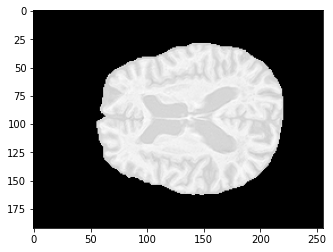

In [71]:
plt.imshow(image_2[:, :, 160], cmap="gray")
plt.show()

nib_image = nib.Nifti1Image(image_2, None)
nib.save(nib_image, "new_image_mrbrains.nii.gz")


In [87]:
image_3 = nib.load("/Users/pierre-luc-delisle/ComputeCanada/ComputeCanada/final_run/DCGAN_scaled_gaussian_filter_5_disc_ratio_1.50/Reconstructed_Normalized_iSEG_Image_90.nii.gz").get_fdata()
mask_3 = nib.load("/Users/pierre-luc-delisle/ComputeCanada/ComputeCanada/final_run/DCGAN_scaled_gaussian_filter_5_disc_ratio_1.50/Reconstructed_Segmented_iSEG_Image_90.nii.gz").get_fdata()



In [88]:
image_3[mask_3==0]=0
max = image_3.max()
image_3 = image_3 / image_3.max()


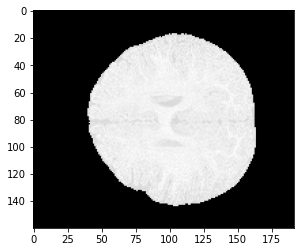

In [89]:
plt.imshow(image_3[:, :, 160], cmap="gray")
plt.show()

nib_image = nib.Nifti1Image(image_3, None)
nib.save(nib_image, "new_image_iseg.nii.gz")



In [6]:
input_mrbrains = nib.load("/Users/pierre-luc-delisle/Documents/DCGAN_canada_scaled_gaussian_filter_5_disc_ratio_5_00/Reconstructed_Input_MRBrainS_Image_90.nii.gz").get_fdata()
input_iseg = nib.load("/Users/pierre-luc-delisle/Documents/DCGAN_canada_scaled_gaussian_filter_5_disc_ratio_5_00/Reconstructed_Input_iSEG_Image_90.nii.gz").get_fdata()
image_mrbrains = nib.load("/Users/pierre-luc-delisle/Documents/DCGAN_canada_scaled_gaussian_filter_5_disc_ratio_5_00/Reconstructed_Normalized_MRBrainS_Image_90.nii.gz").get_fdata()
image_iseg = nib.load("/Users/pierre-luc-delisle/Documents/DCGAN_canada_scaled_gaussian_filter_5_disc_ratio_5_00/Reconstructed_Normalized_iSEG_Image_90.nii.gz").get_fdata()
seg_mrbrains = nib.load("/Users/pierre-luc-delisle/Documents/DCGAN_canada_scaled_gaussian_filter_5_disc_ratio_5_00/Reconstructed_Segmented_MRBrainS_Image_90.nii.gz").get_fdata()
gt_mrbrains = nib.load("/Users/pierre-luc-delisle/Documents/DCGAN_canada_scaled_gaussian_filter_5_disc_ratio_5_00/Reconstructed_Ground_Truth_MRBrainS_Image_90.nii.gz").get_fdata()
seg_iseg = nib.load("/Users/pierre-luc-delisle/Documents/DCGAN_canada_scaled_gaussian_filter_5_disc_ratio_5_00/Reconstructed_Segmented_iSEG_Image_90.nii.gz").get_fdata()
gt_iseg = nib.load("/Users/pierre-luc-delisle/Documents/DCGAN_canada_scaled_gaussian_filter_5_disc_ratio_5_00/Reconstructed_Ground_Truth_iSEG_Image_90.nii.gz").get_fdata()

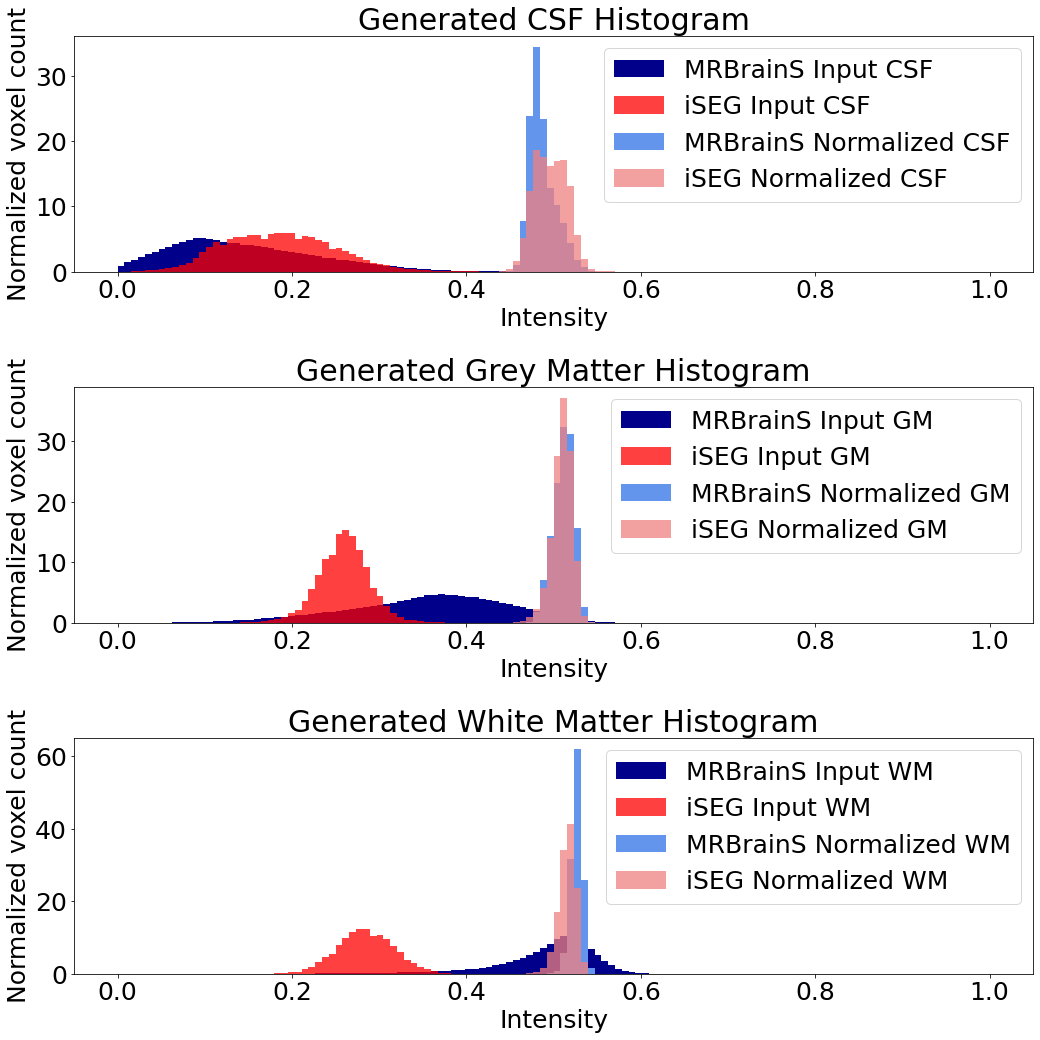

In [7]:
fig1, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))


_, bins, _ = ax1.hist(input_mrbrains.flatten()[np.where(gt_mrbrains.flatten() == 1)], bins=128,
                          range=(0, 1),
                          density=True, label="MRBrainS Input CSF", color="darkblue")
_ = ax1.hist(input_iseg.flatten()[np.where(gt_iseg.flatten() == 1)], bins=128,
                          range=(0, 1), alpha=0.75,
                          density=True, label="iSEG Input CSF", color="red")
_ = ax1.hist(image_mrbrains.flatten()[np.where(seg_mrbrains.flatten() == 1)], bins=128,
                          range=(0, 1),
                          density=True, label="MRBrainS Normalized CSF", color="cornflowerblue")
_ = ax1.hist(image_iseg.flatten()[np.where(seg_iseg.flatten() == 1)], bins=128,
                          range=(0, 1), alpha=0.75,
                          density=True, label="iSEG Normalized CSF", color="lightcoral")
ax1.set_xlabel("Intensity")
ax1.set_ylabel("Normalized voxel count")
ax1.set_title("Generated CSF Histogram")
ax1.legend()

_, bins, _ = ax2.hist(input_mrbrains.flatten()[np.where(gt_mrbrains.flatten() == 2)], bins=128,
                          range=(0, 1),
                          density=True, label="MRBrainS Input GM", color="darkblue")
_ = ax2.hist(input_iseg.flatten()[np.where(gt_iseg.flatten() == 2)], bins=128,
                          range=(0, 1), alpha=0.75,
                          density=True, label="iSEG Input GM", color="red")
_ = ax2.hist(image_mrbrains.flatten()[np.where(seg_mrbrains.flatten() == 2)], bins=128,
                          range=(0, 1),
                          density=True, label="MRBrainS Normalized GM", color="cornflowerblue")
_ = ax2.hist(image_iseg.flatten()[np.where(seg_iseg.flatten() == 2)], bins=128,
                          range=(0, 1), alpha=0.75,
                          density=True, label="iSEG Normalized GM", color="lightcoral")
ax2.set_xlabel("Intensity")
ax2.set_ylabel("Normalized voxel count")
ax2.set_title("Generated Grey Matter Histogram")
ax2.legend()

_, bins, _ = ax3.hist(input_mrbrains.flatten()[np.where(gt_mrbrains.flatten() == 3)], bins=128,
                          range=(0, 1),
                          density=True, label="MRBrainS Input WM", color="darkblue")
_ = ax3.hist(input_iseg.flatten()[np.where(gt_iseg.flatten() == 3)], bins=128,
                          range=(0, 1), alpha=0.75,
                          density=True, label="iSEG Input WM", color="red")
_ = ax3.hist(image_mrbrains.flatten()[np.where(seg_mrbrains.flatten() == 3)], bins=128,
                          range=(0, 1),
                          density=True, label="MRBrainS Normalized WM", color="cornflowerblue")
_ = ax3.hist(image_iseg.flatten()[np.where(seg_iseg.flatten() == 3)], bins=128,
                          range=(0, 1), alpha=0.75,
                          density=True, label="iSEG Normalized WM", color="lightcoral")
ax3.set_xlabel("Intensity")
ax3.set_ylabel("Normalized voxel count")
ax3.set_title("Generated White Matter Histogram")
ax3.legend()

fig1.tight_layout()
fig1.savefig("histograms.png")

In [11]:

input_mrbrains = nib.load("/Users/pierre-luc-delisle/Documents/DualUNet_canada_scaled_dual_dataset/reconstructed_images/Reconstructed_Input_MRBrainS_Image_80.nii.gz").get_fdata()
input_iseg = nib.load("/Users/pierre-luc-delisle/Documents/DualUNet_canada_scaled_dual_dataset/reconstructed_images/Reconstructed_Input_iSEG_Image_80.nii.gz").get_fdata()
image_mrbrains = nib.load("/Users/pierre-luc-delisle/Documents/DualUNet_canada_scaled_dual_dataset/reconstructed_images/Reconstructed_Normalized_MRBrainS_Image_80.nii.gz").get_fdata()
image_iseg = nib.load("/Users/pierre-luc-delisle/Documents/DualUNet_canada_scaled_dual_dataset/reconstructed_images/Reconstructed_Normalized_iSEG_Image_80.nii.gz").get_fdata()
seg_mrbrains = nib.load("/Users/pierre-luc-delisle/Documents/DualUNet_canada_scaled_dual_dataset/reconstructed_images/Reconstructed_Segmented_MRBrainS_Image_80.nii.gz").get_fdata()
gt_mrbrains = nib.load("/Users/pierre-luc-delisle/Documents/DualUNet_canada_scaled_dual_dataset/reconstructed_images/Reconstructed_Ground_Truth_MRBrainS_Image_80.nii.gz").get_fdata()
seg_iseg = nib.load("/Users/pierre-luc-delisle/Documents/DualUNet_canada_scaled_dual_dataset/reconstructed_images/Reconstructed_Segmented_iSEG_Image_80.nii.gz").get_fdata()
gt_iseg = nib.load("/Users/pierre-luc-delisle/Documents/DualUNet_canada_scaled_dual_dataset/reconstructed_images/Reconstructed_Ground_Truth_iSEG_Image_80.nii.gz").get_fdata()

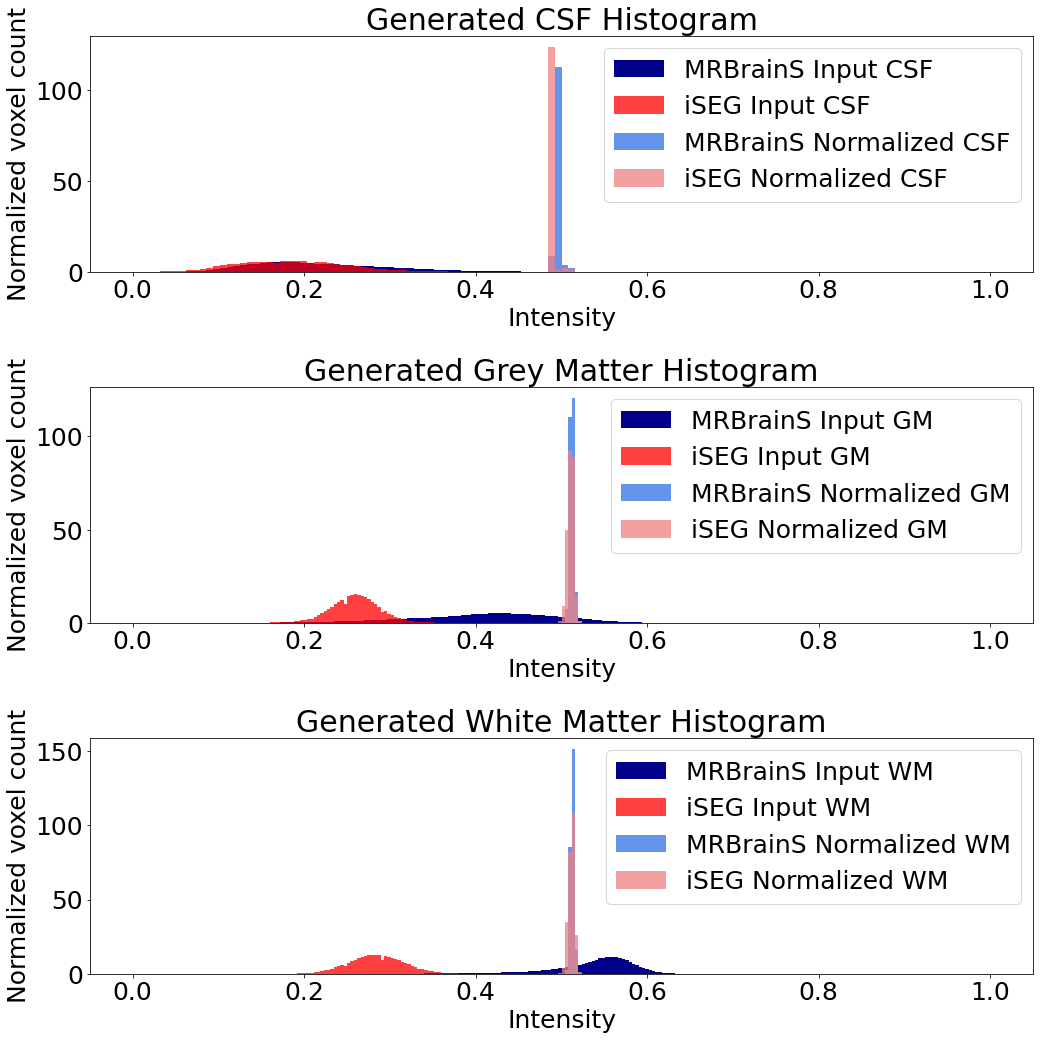

In [12]:
fig1, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))


_, bins, _ = ax1.hist(input_mrbrains.flatten()[np.where(gt_mrbrains.flatten() == 1)], bins=128,
                          range=(0, 1),
                          density=True, label="MRBrainS Input CSF", color="darkblue")
_ = ax1.hist(input_iseg.flatten()[np.where(gt_iseg.flatten() == 1)], bins=128,
                          range=(0, 1), alpha=0.75,
                          density=True, label="iSEG Input CSF", color="red")
_ = ax1.hist(image_mrbrains.flatten()[np.where(seg_mrbrains.flatten() == 1)], bins=128,
                          range=(0, 1),
                          density=True, label="MRBrainS Normalized CSF", color="cornflowerblue")
_ = ax1.hist(image_iseg.flatten()[np.where(seg_iseg.flatten() == 1)], bins=128,
                          range=(0, 1), alpha=0.75,
                          density=True, label="iSEG Normalized CSF", color="lightcoral")
ax1.set_xlabel("Intensity")
ax1.set_ylabel("Normalized voxel count")
ax1.set_title("Generated CSF Histogram")
ax1.legend()

_, bins, _ = ax2.hist(input_mrbrains.flatten()[np.where(gt_mrbrains.flatten() == 2)], bins=256,
                          range=(0, 1),
                          density=True, label="MRBrainS Input GM", color="darkblue")
_ = ax2.hist(input_iseg.flatten()[np.where(gt_iseg.flatten() == 2)], bins=256,
                          range=(0, 1), alpha=0.75,
                          density=True, label="iSEG Input GM", color="red")
_ = ax2.hist(image_mrbrains.flatten()[np.where(seg_mrbrains.flatten() == 2)], bins=256,
                          range=(0, 1),
                          density=True, label="MRBrainS Normalized GM", color="cornflowerblue")
_ = ax2.hist(image_iseg.flatten()[np.where(seg_iseg.flatten() == 2)], bins=256,
                          range=(0, 1), alpha=0.75,
                          density=True, label="iSEG Normalized GM", color="lightcoral")
ax2.set_xlabel("Intensity")
ax2.set_ylabel("Normalized voxel count")
ax2.set_title("Generated Grey Matter Histogram")
ax2.legend()

_, bins, _ = ax3.hist(input_mrbrains.flatten()[np.where(gt_mrbrains.flatten() == 3)], bins=256,
                          range=(0, 1),
                          density=True, label="MRBrainS Input WM", color="darkblue")
_ = ax3.hist(input_iseg.flatten()[np.where(gt_iseg.flatten() == 3)], bins=256,
                          range=(0, 1), alpha=0.75,
                          density=True, label="iSEG Input WM", color="red")
_ = ax3.hist(image_mrbrains.flatten()[np.where(seg_mrbrains.flatten() == 3)], bins=256,
                          range=(0, 1),
                          density=True, label="MRBrainS Normalized WM", color="cornflowerblue")
_ = ax3.hist(image_iseg.flatten()[np.where(seg_iseg.flatten() == 3)], bins=256,
                          range=(0, 1), alpha=0.75,
                          density=True, label="iSEG Normalized WM", color="lightcoral")
ax3.set_xlabel("Intensity")
ax3.set_ylabel("Normalized voxel count")
ax3.set_title("Generated White Matter Histogram")
ax3.legend()

fig1.tight_layout()
fig1.savefig("histograms.png")

In [10]:
input_mrbrains = nib.load("/Users/pierre-luc-delisle/ComputeCanada/ComputeCanada/final_run/DualUNet_canada_dual_dataset/Reconstructed_Input_MRBrainS_Image_80.nii.gz").get_fdata()
input_iseg = nib.load("/Users/pierre-luc-delisle/ComputeCanada/ComputeCanada/final_run/DualUNet_canada_dual_dataset/Reconstructed_Input_iSEG_Image_80.nii.gz").get_fdata()
image_mrbrains = nib.load("/Users/pierre-luc-delisle/ComputeCanada/ComputeCanada/final_run/DualUNet_canada_dual_dataset/Reconstructed_Normalized_MRBrainS_Image_80.nii.gz").get_fdata()
image_iseg = nib.load("/Users/pierre-luc-delisle/ComputeCanada/ComputeCanada/final_run/DualUNet_canada_dual_dataset/Reconstructed_Normalized_iSEG_Image_80.nii.gz").get_fdata()
seg_mrbrains = nib.load("/Users/pierre-luc-delisle/ComputeCanada/ComputeCanada/final_run/DualUNet_canada_dual_dataset/Reconstructed_Segmented_MRBrainS_Image_80.nii.gz").get_fdata()
gt_mrbrains = nib.load("/Users/pierre-luc-delisle/ComputeCanada/ComputeCanada/final_run/DualUNet_canada_dual_dataset/Reconstructed_Ground_Truth_MRBrainS_Image_80.nii.gz").get_fdata()
seg_iseg = nib.load("/Users/pierre-luc-delisle/ComputeCanada/ComputeCanada/final_run/DualUNet_canada_dual_dataset/Reconstructed_Segmented_iSEG_Image_80.nii.gz").get_fdata()
gt_iseg = nib.load("/Users/pierre-luc-delisle/ComputeCanada/ComputeCanada/final_run/DualUNet_canada_dual_dataset/Reconstructed_Ground_Truth_iSEG_Image_80.nii.gz").get_fdata()

FileNotFoundError: No such file or no access: '/Users/pierre-luc-delisle/ComputeCanada/ComputeCanada/final_run/DualUNet_canada_dual_dataset/Reconstructed_Input_MRBrainS_Image_80.nii.gz'

In [ ]:
fig1, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))


_, bins, _ = ax1.hist(input_mrbrains.flatten()[np.where(gt_mrbrains.flatten() == 1)], bins=256,
                          range=(0, 1),
                          density=True, label="MRBrainS Input CSF", color="darkblue")
_ = ax1.hist(input_iseg.flatten()[np.where(gt_iseg.flatten() == 1)], bins=256,
                          range=(0, 1),
                          alpha=0.75,
                          density=True, label="iSEG Input CSF", color="red")
_ = ax1.hist(image_mrbrains.flatten()[np.where(seg_mrbrains.flatten() == 1)], bins=256,
                          range=(0, 1),
                          density=True, label="MRBrainS Normalized CSF", color="cornflowerblue")
_ = ax1.hist(image_iseg.flatten()[np.where(seg_iseg.flatten() == 1)], bins=256,
                          range=(0, 1),
                          alpha=0.75,
                          density=True, label="iSEG Normalized CSF", color="lightcoral")
ax1.set_xlabel("Intensity")
ax1.set_ylabel("Normalized voxel count")
ax1.set_title("Generated CSF Histogram")
ax1.legend()

_, bins, _ = ax2.hist(input_mrbrains.flatten()[np.where(gt_mrbrains.flatten() == 2)], bins=256,
                          range=(0, 1),
                          density=True, label="MRBrainS Input GM", color="darkblue")
_ = ax2.hist(input_iseg.flatten()[np.where(gt_iseg.flatten() == 2)], bins=256,
                          range=(0, 1),
                          alpha=0.75,
                          density=True, label="iSEG Input GM", color="red")
_ = ax2.hist(image_mrbrains.flatten()[np.where(seg_mrbrains.flatten() == 2)], bins=256,
                          range=(0, 1),
                          density=True, label="MRBrainS Normalized GM", color="cornflowerblue")
_ = ax2.hist(image_iseg.flatten()[np.where(seg_iseg.flatten() == 2)], bins=256,
                          range=(0, 1),
                          alpha=0.75,
                          density=True, label="iSEG Normalized GM", color="lightcoral")
ax2.set_xlabel("Intensity")
ax2.set_ylabel("Normalized voxel count")
ax2.set_title("Generated Grey Matter Histogram")
ax2.legend()

_, bins, _ = ax3.hist(input_mrbrains.flatten()[np.where(gt_mrbrains.flatten() == 3)], bins=256,
                          range=(0, 1),
                          density=True, label="MRBrainS Input WM", color="darkblue")
_ = ax3.hist(input_iseg.flatten()[np.where(gt_iseg.flatten() == 3)], bins=256,
                          range=(0, 1),
                          alpha=0.75,
                          density=True, label="iSEG Input WM", color="red")
_ = ax3.hist(image_mrbrains.flatten()[np.where(seg_mrbrains.flatten() == 3)], bins=256,
                          range=(0, 1),
                          density=True, label="MRBrainS Normalized WM", color="cornflowerblue")
_ = ax3.hist(image_iseg.flatten()[np.where(seg_iseg.flatten() == 3)], bins=256,
                          range=(0, 1),
                          alpha=0.75,
                          density=True, label="iSEG Normalized WM", color="lightcoral")
ax3.set_xlabel("Intensity")
ax3.set_ylabel("Normalized voxel count")
ax3.set_title("Generated White Matter Histogram")
ax3.legend()

fig1.tight_layout()
fig1.savefig("histograms_dual_unet.png")